# Introduction to convolutional neural network

In [ ]:
# Get the data
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2023-04-17 10:28:29--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.191.128, 173.194.74.128, 173.194.192.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.191.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   206MB/s    in 0.5s    

2023-04-17 10:28:30 (206 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



In [ ]:
# Unzip the download file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

In [ ]:
# Inspect the data
!ls pizza_steak/train/steak # List the items in pizza_steak

In [ ]:
import os

# Walk trough pizza steack directory and list number of files

#for dirpatch, dirnames, filenames in os.walk("pizza_steak"):
#  print(f" There are {len(dirnames)} directories and {len(filenames) images in '{dirpath}'.")

In [ ]:
# Another way to define out how many images are in a file

num_steack_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steack_images_train

750

In [ ]:
# To visualize our images, first let's get the class names programatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Create a list of class_names for the subdirectory
class_names = class_names[:] # remove .DS_store
print(class_names)

['pizza' 'steak']


In [ ]:
# Visualize the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  #Setup the target directory
  target_folder = target_dir+target_class
  # Fet a random image
  random_image = random.sample(os.listdir(target_folder), 1)
  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape:  {img.shape}") # Show the shape of the image
  return img


Image shape:  (512, 512, 3)


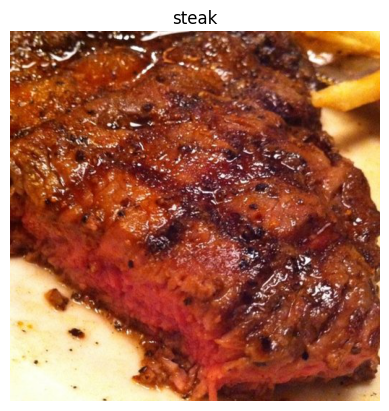

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir = "pizza_steak/train/",
                        target_class = "steak")

In [ ]:
# Array 
img

In [ ]:
import tensorflow as tf
tf.constant(img)

In [ ]:
# View the image shape
img.shape # returns width, heiht, colour channels

(512, 512, 3)

In [ ]:
# Fet all the pixel values between 0 and 1


# An end-to-end example
* Load our images
* Preprocess our images
* Bild a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN  to our training data

In [ ]:
# Create the model --> CNN 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set seed
tf.random.set_seed(42)

# Setup paths to our data directories (two ways to do that)
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

# Preprocess data (get all the pixels between 0 and 1)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)


# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode = "binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size = (224, 224),
                                               class_mode="binary",
                                               seed=42)

# 1.Build the model CNN
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                            kernel_size=3,
                            activation="relu",
                            input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation ="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")                        

])


# Compile our CNN

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])


# Fit the model
history_1 = model_1.fit(train_data,
                        epochs = 20,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data)
)

 We have 47 batches of 32 images 1500/32 = 47     --> len(train_data)=47

In [ ]:
model_1.summary()

In [ ]:
model_1.predict(valid_data)
model_1.evaluate

16/16 [==============================] - 2s 138ms/step


<bound method Model.evaluate of <keras.engine.sequential.Sequential object at 0x7ff7fc104430>>

#Visualize the data

Image shape:  (287, 512, 3)
Image shape:  (512, 512, 3)


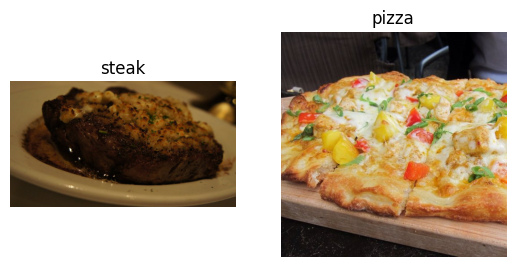

In [ ]:
# Visualizing the data
plt.figure()
plt.subplot(1,2,1)
steakimg = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

# Preprocessing the data

In [ ]:
# Define directory dataset pathc
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [ ]:
!nvidia-smi

Mon Apr 17 09:44:03 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   76C    P0    34W /  70W |   2911MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Batches --> size of 32

# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [ ]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,  # Target directory of images
                                               target_size = (224,224), # Target size of images (height, width)
                                               class_mode = "binary", # type of data you're working with
                                               batch_size=32) # size of minibatchesnto load data into
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size = (224, 224),
                                             class_mode = "binary",
                                             batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of a train data batch
images, labels = train_data.next() # get the next batch of images/labels
len(images), len(labels)

(32, 32)

In [ ]:
# Get the first image
images[:1], images[0].shape # Thr image has been rescale

In [ ]:
# View the first batch of labels
labels

array([1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1.],
      dtype=float32)

# Create a CNN model 

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential


In [ ]:
# Create the model
model_2 = Sequential([
    Conv2D(filters = 10, 
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape = (224,224,3)),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation = "relu"),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

# Compile the model

model_2.compile(loss="binary_crossentropy",
                optimizer = Adam(),
                metrics=["accuracy"])


# Fit the model
history = model_2.fit(train_data,
                      epochs=5,
                      steps_per_epoch = len(train_data),
                      validation_data = test_data,
                      validation_steps = len(test_data))
#                      callbacks=[tensorbord_callback])

Epoch 1/5
47/47 [==============================] - 13s 224ms/step - loss: 0.7606 - accuracy: 0.6707 - val_loss: 0.4569 - val_accuracy: 0.8000
Epoch 2/5
47/47 [==============================] - 10s 218ms/step - loss: 0.4121 - accuracy: 0.8213 - val_loss: 0.3321 - val_accuracy: 0.8560
Epoch 3/5
47/47 [==============================] - 10s 217ms/step - loss: 0.2645 - accuracy: 0.9053 - val_loss: 0.2997 - val_accuracy: 0.8680
Epoch 4/5
47/47 [==============================] - 10s 219ms/step - loss: 0.1562 - accuracy: 0.9527 - val_loss: 0.3925 - val_accuracy: 0.8220
Epoch 5/5
47/47 [==============================] - 13s 280ms/step - loss: 0.0795 - accuracy: 0.9787 - val_loss: 0.3340 - val_accuracy: 0.8540


In [ ]:
# Evaluate
model_2.evaluate(test_data)

16/16 [==============================] - 4s 226ms/step - loss: 0.3340 - accuracy: 0.8540


[0.3340170383453369, 0.8539999723434448]

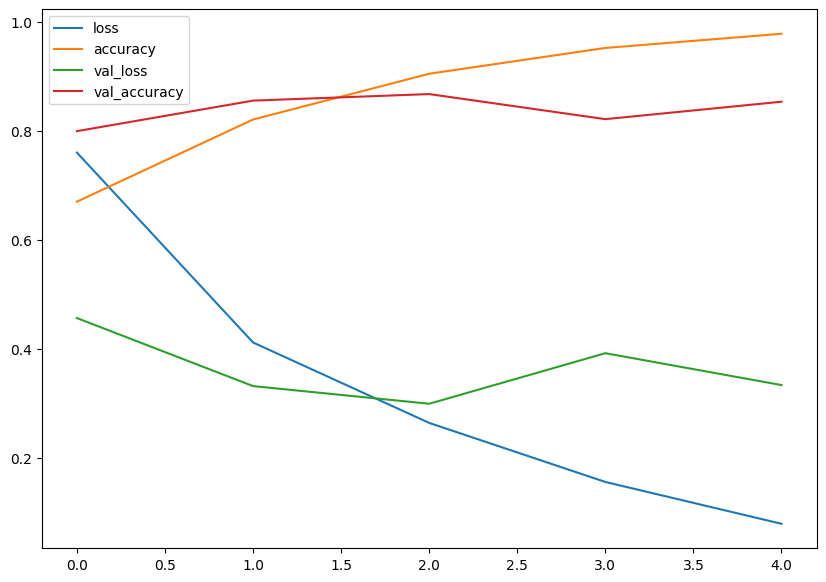

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(10, 7));

In [ ]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Return separate loss curves for training and validation metrics
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  epochs = range(len(history.history["loss"]))

  # Plot loss

  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_accuracy")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()


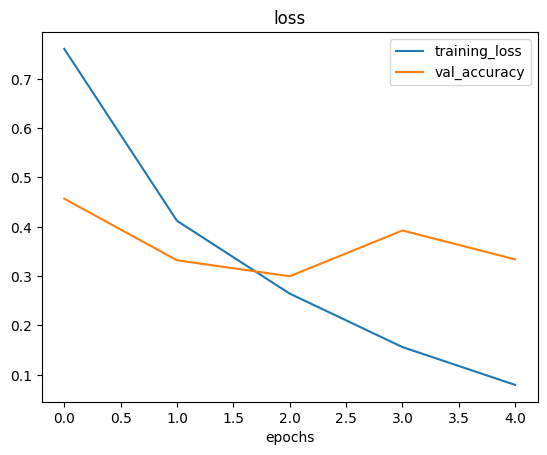

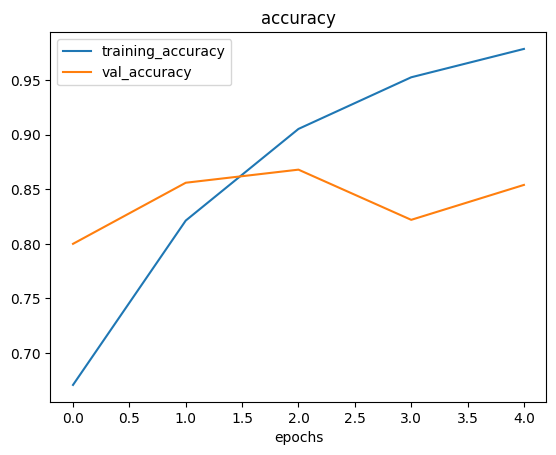

In [ ]:
plot_loss_curves(history)

# Adjust the model parameters
Ways to prevent overfitting
* Increase the number of conv layers
* Increase the number of conv filters
* Add another layer to the output of our flattened layer

Reduce overfitting
* Add data augmentation
* Add regularization layers (MaxPool)
* Add more data

In [ ]:
# Creating another model

model_3 = Sequential([
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_3.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])


history_3 = model_3.fit(train_data,
                      epochs=7,
                      steps_per_epoch = len(train_data),
                      validation_data=test_data,
                      validation_steps = len(valid_data))

Epoch 1/7
47/47 [==============================] - 17s 283ms/step - loss: 0.5640 - accuracy: 0.7193 - val_loss: 0.4448 - val_accuracy: 0.8040
Epoch 2/7
47/47 [==============================] - 11s 237ms/step - loss: 0.4553 - accuracy: 0.7860 - val_loss: 0.4281 - val_accuracy: 0.8100
Epoch 3/7
47/47 [==============================] - 12s 252ms/step - loss: 0.4356 - accuracy: 0.8053 - val_loss: 0.4179 - val_accuracy: 0.8020
Epoch 4/7
47/47 [==============================] - 15s 321ms/step - loss: 0.4090 - accuracy: 0.8153 - val_loss: 0.3564 - val_accuracy: 0.8300
Epoch 5/7
47/47 [==============================] - 10s 208ms/step - loss: 0.3988 - accuracy: 0.8287 - val_loss: 0.3568 - val_accuracy: 0.8440
Epoch 6/7
47/47 [==============================] - 10s 209ms/step - loss: 0.3746 - accuracy: 0.8420 - val_loss: 0.3262 - val_accuracy: 0.8560
Epoch 7/7
47/47 [==============================] - 11s 227ms/step - loss: 0.3367 - accuracy: 0.8553 - val_loss: 0.3076 - val_accuracy: 0.8660


In [ ]:
model_3.evaluate(test_data)

16/16 [==============================] - 2s 144ms/step - loss: 0.3076 - accuracy: 0.8660


[0.3076113760471344, 0.8659999966621399]

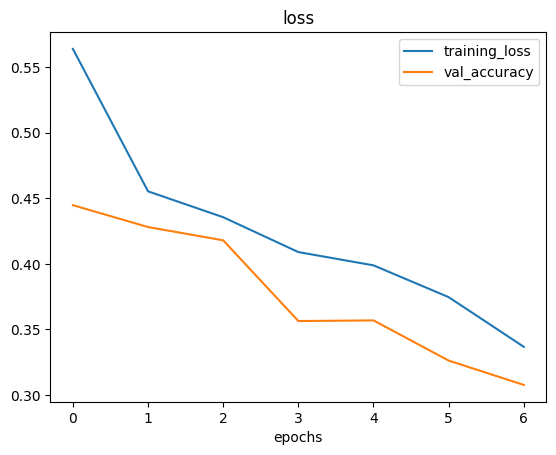

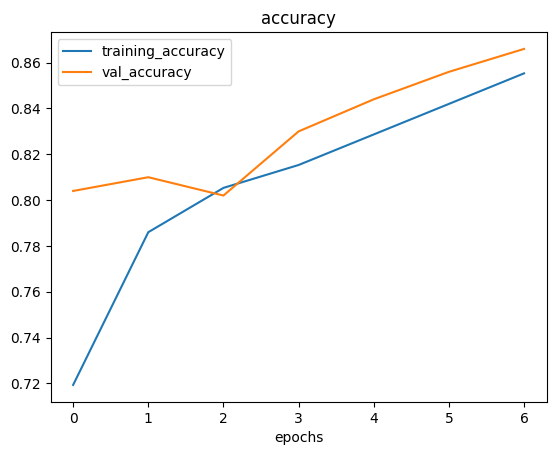

In [ ]:
plot_loss_curves(history_3)

# Data Augmentation

In [ ]:
# Create ImageDataGenerator training instances
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [ ]:
# Import data and augment it from trainig directory
print("Augmented training data: ")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False)

# Create non-augmented train test batches
print("Non-augmented trainingdata: ")
train_data = train_datagen.flow_from_directory(train_dir, 
                                               target_size=(224,224), 
                                               batch_size=32, 
                                               class_mode="binary",
                                               shuffle=False)

IMG_SIZE = (224,224)

# Create non_augmented test data batches
print("Non-augmented test data: ")
test_data = test_datagen.flow_from_directory(test_dir,
                                            target_size=(224,224), 
                                            batch_size=32, 
                                            class_mode="binary",
                                             shuffle=False)


Augmented training data: 
Found 1500 images belonging to 2 classes.
Non-augmented trainingdata: 
Found 1500 images belonging to 2 classes.
Non-augmented test data: 
Found 500 images belonging to 2 classes.


# Visualize augmented data

In [ ]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Labels are not augmented, only data

Showing image number: 8


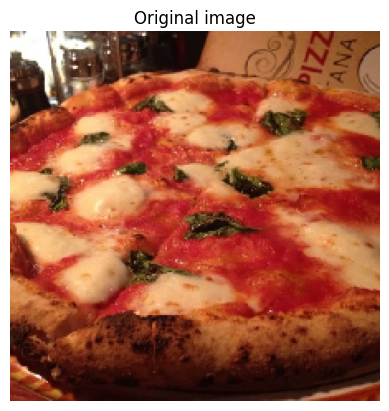

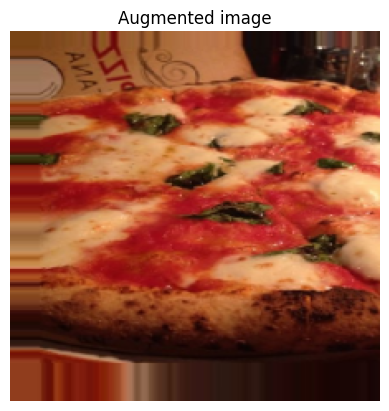

In [ ]:
# Show original images and augmented image
import random
random_number = random.randint(0,32) # Our batch sizes are 32
print(f"Showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);


In [ ]:
model_4 = Sequential([
    Conv2D(10,3,activation="relu"),
    MaxPool2D(2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(2),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(2),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics = ["accuracy"])

history_4 = model_4.fit(train_data_augmented,
                        epochs = 5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps=len(test_data))



Epoch 1/5
47/47 [==============================] - 26s 510ms/step - loss: 0.7940 - accuracy: 0.4600 - val_loss: 0.6918 - val_accuracy: 0.5120
Epoch 2/5
30/47 [==================>...........] - ETA: 7s - loss: 0.6961 - accuracy: 0.3839

KeyboardInterrupt: ignored

In [ ]:
# Check our model training curves
plot_loss_curves(history_4)

# Shuffling the data

In [ ]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=True)

model_5 = Sequential([
    Conv2D(10,3,activation="relu"),
    MaxPool2D(2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(2),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(2),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics = ["accuracy"])

history_5 = model_5.fit(train_data_augmented,
                        epochs = 5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps=len(test_data))



Found 1500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 26s 502ms/step - loss: 0.6565 - accuracy: 0.6400 - val_loss: 0.4939 - val_accuracy: 0.7980
Epoch 2/5
47/47 [==============================] - 29s 614ms/step - loss: 0.5611 - accuracy: 0.7213 - val_loss: 0.4029 - val_accuracy: 0.8360
Epoch 3/5
47/47 [==============================] - 38s 793ms/step - loss: 0.5066 - accuracy: 0.7660 - val_loss: 0.3977 - val_accuracy: 0.8020
Epoch 4/5
47/47 [==============================] - 23s 496ms/step - loss: 0.4928 - accuracy: 0.7747 - val_loss: 0.3773 - val_accuracy: 0.8280
Epoch 5/5
47/47 [==============================] - 23s 497ms/step - loss: 0.4757 - accuracy: 0.7827 - val_loss: 0.3344 - val_accuracy: 0.8580


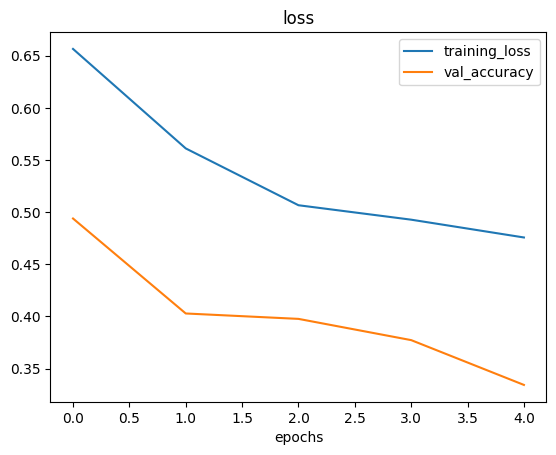

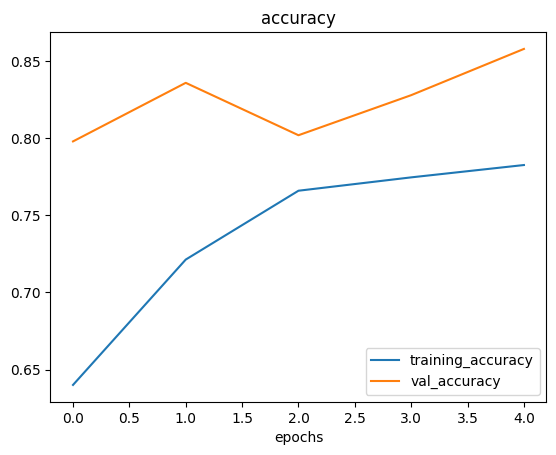

In [ ]:
# Check our model training curves
plot_loss_curves(history_5)

# Making prediction with our trained model on our own custom data

--2023-04-17 09:58:58--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2023-04-17 09:58:58 (31.4 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

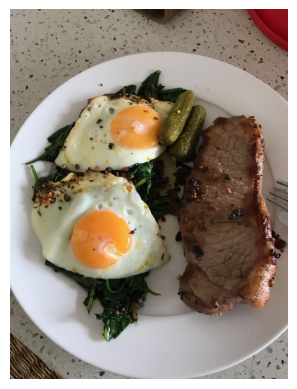

In [ ]:
# View our example image
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [ ]:
# Check the shapes
steak.shape

(4032, 3024, 3)

### To make a prediction with our costum data is preprocessed as the train data

In [ ]:
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turn it into tensor and reshape it"""

  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  #Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
# Load in and preprocess image
steak = load_and_prep_image("03-steak.jpeg")

In [ ]:
# Expand the dimension epochs
pred = model_5.predict(tf.expand_dims(steak, axis=0))

1/1 [==============================] - 0s 31ms/step


In [ ]:
# Index the predicted class
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):

  """ 
  Imports an image located at filename,
   makes a prediction with model and plot
    the image with the predicted class
  """

  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and the predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);



1/1 [==============================] - 0s 21ms/step


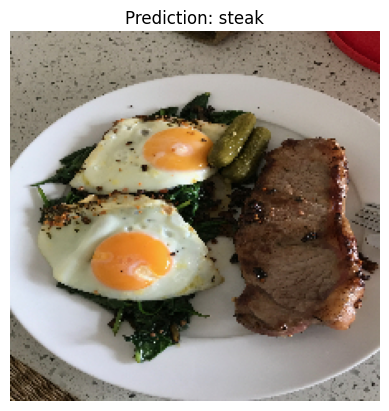

In [ ]:
pred_and_plot(model_5, "03-steak.jpeg")